In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras import layers
from tensorflow.keras.models import Sequential, save_model
from tensorflow.keras.layers import LSTM, Dropout, Dense,Input,Bidirectional,GlobalMaxPooling1D,GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import concatenate
from keras import *
#from common_variables import *
#from time_series import *

In [ ]:
class Trader():
  def __init__(self,file_path,use_cols),seq_len=128):
    self.df = pd.read_csv(file_path,delimiter=',',usecols=use_cols)
    self.columns = use_cols
    self.seq_len = seq_len

  def preprocess(self):
    if 'Volume' in self.columns:
      self.df['Volume'].replace(to_replace=0, method='ffill', inplace=True) 
    self.df.sort_values('Date', inplace=True)

  def print_output(self):
    self.preprocess()
    print("Data:{}".format(self.df))

  def plot_columns(self,x_column,y_column):
    dates = ['1962-02-01','1967-10-23','1973-09-24','1979-07-11','1985-04-24','1991-02-07','1996-11-20','2002-09-18','2008-07-14','2014-05-07','2020-03-02']
    dates = [np.arange(x_column)]
    plt.figure(figsize=(20,8))
    plt.plot(df[x_column],df[y_column])
    plt.xlabel(x_column)
    plt.xticks(dates)
    plt.ylabel(y_column)

  def split_data(self,data):

  def create_model(self,data):

  def 

In [ ]:
trader = Trader('IBM.csv',['Date', 'Open', 'High', 'Low', 'Close', 'Volume'])

In [ ]:
trader.print_output()

Data:             Date        Open        High         Low       Close   Volume
0      1962-02-01    7.300000    7.413333    7.300000    7.393333   640000
1      1962-02-02    7.393333    7.440000    7.360000    7.440000   507200
2      1962-02-05    7.440000    7.440000    7.306667    7.346667   312000
3      1962-02-06    7.346667    7.360000    7.320000    7.353333   256000
4      1962-02-07    7.360000    7.400000    7.360000    7.360000   251200
...           ...         ...         ...         ...         ...      ...
14818  2020-12-14  125.320000  126.239998  123.470001  123.529999  5050000
14819  2020-12-15  124.389999  125.930000  123.440002  125.930000  4359600
14820  2020-12-16  125.930000  126.570000  125.290001  125.550003  4530100
14821  2020-12-17  126.080002  126.089996  124.910004  125.550003  3788000
14822  2020-12-18  125.589996  126.400002  124.970001  125.849998  7550600

[14823 rows x 6 columns]


In [ ]:
df = pd.read_csv('IBM.csv', delimiter=',', usecols=['Date', 'Open', 'High', 'Low', 'Close', 'Volume'])
# Replace 0 to avoid dividing by 0 later on
df['Volume'].replace(to_replace=0, method='ffill', inplace=True) 
df.sort_values('Date', inplace=True)
df.head()

,Date,Open,High,Low,Close,Volume
0,1962-02-01,7.300000,7.413333,7.300000,7.393333,640000
1,1962-02-02,7.393333,7.440000,7.360000,7.440000,507200
2,1962-02-05,7.440000,7.440000,7.306667,7.346667,312000
3,1962-02-06,7.346667,7.360000,7.320000,7.353333,256000
4,1962-02-07,7.360000,7.400000,7.360000,7.360000,251200


In [ ]:
seq_len=128

Text(0, 0.5, 'Price')

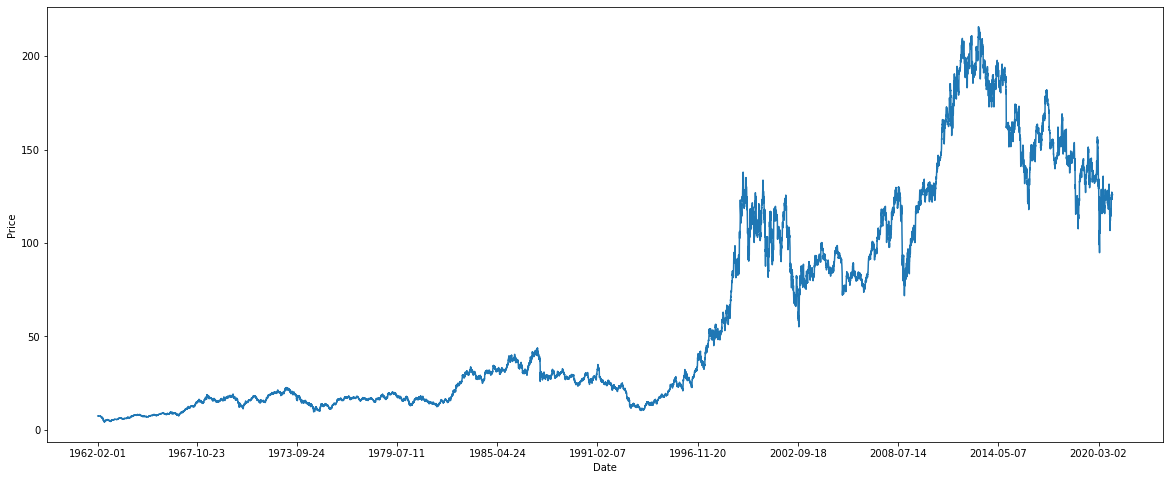

In [ ]:
dates = ['1962-02-01','1967-10-23','1973-09-24','1979-07-11','1985-04-24','1991-02-07','1996-11-20','2002-09-18','2008-07-14','2014-05-07','2020-03-02']
plt.figure(figsize=(20,8))
plt.plot(df['Date'],df['Close'])
plt.xlabel('Date')
plt.xticks(dates)
plt.ylabel('Price')

Text(0, 0.5, 'Volume')

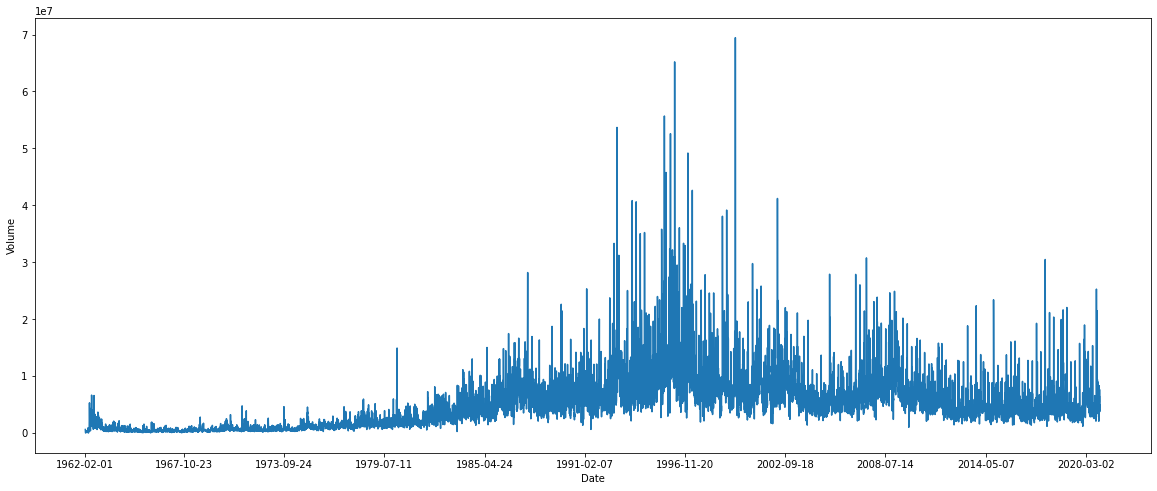

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(df['Date'],df['Volume'])
plt.xlabel('Date')
plt.xticks(dates)
plt.ylabel('Volume')

In [ ]:
df_original = df.copy()

In [ ]:
#convert to percentage change
df['Open'] = df['Open'].pct_change()
df['High'] = df['High'].pct_change()
df['Low'] = df['Low'].pct_change()
df['Close'] = df['Close'].pct_change()

df['Volume'] = df['Volume'].pct_change()

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume
1,1962-02-02,0.012785,0.003597,0.008219,0.006312,-0.207500
2,1962-02-05,0.006312,0.000000,-0.007246,-0.012545,-0.384858
3,1962-02-06,-0.012545,-0.010753,0.001825,0.000907,-0.179487
4,1962-02-07,0.001815,0.005435,0.005464,0.000907,-0.018750
5,1962-02-08,0.000000,0.000000,0.000000,0.000906,-0.936306


In [ ]:
#Perform min-max normalisation
price_min = min(df[['Open','High','Low','Close']].min(axis=0))
price_max = max(df[['Open','High','Low','Close']].max(axis=1))

df['Open'] = (df['Open'] - price_min)/(price_max-price_min)
df['High'] = (df['High'] - price_min)/(price_max-price_min)
df['Low'] = (df['Low'] - price_min)/(price_max-price_min)
df['Close'] = (df['Close'] - price_min)/(price_max-price_min)

Volume_min = df['Volume'].min(axis=0)
Volume_max = df['Volume'].max(axis=0)

df['Volume'] = (df['Volume'] - Volume_min)/(Volume_max-Volume_min)

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume
1,1962-02-02,0.623461,0.601015,0.612306,0.607647,0.028019
2,1962-02-05,0.607647,0.592227,0.574525,0.561581,0.021441
3,1962-02-06,0.561581,0.565959,0.596685,0.594444,0.029057
4,1962-02-07,0.596661,0.605504,0.605577,0.594442,0.035019
5,1962-02-08,0.592227,0.592227,0.592227,0.594440,0.000989


In [ ]:
## Create training data, validation data and test data
def data_split(df,val_split,test_split):
  test_index = len(df)-int(test_split*len(df))
  val_index = test_index - int(val_split*len(df))
  df_train = df[:val_index]
  df_val = df[val_index:test_index]
  df_test = df[test_index:]

  return df_train,df_val,df_test


#Create LSTM Batches
def create_batch(data,seq_len):
  X,y = [],[]
  for i in range(seq_len,len(data)):
    X.append(data[i-seq_len:i])
    y.append(data[:,3][i])

  return np.array(X),np.array(y)

  

In [ ]:
df.drop(columns=['Date'],inplace=True)

In [ ]:
df.head()

,Open,High,Low,Close,Volume
1,0.623461,0.601015,0.612306,0.607647,0.028019
2,0.607647,0.592227,0.574525,0.561581,0.021441
3,0.561581,0.565959,0.596685,0.594444,0.029057
4,0.596661,0.605504,0.605577,0.594442,0.035019
5,0.592227,0.592227,0.592227,0.594440,0.000989


In [ ]:
df_train,df_val,df_test = data_split(df,0.1,0.1)

In [ ]:
X_train, y_train = create_batch(df_train.values,seq_len)
X_val,y_val = create_batch(df_val.values,seq_len)
X_test,y_test = create_batch(df_test.values,seq_len)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(11730, 128, 5) (11730,)
(1354, 128, 5) (1354,)


In [ ]:
print(X_test.shape, y_test.shape)

(1354, 128, 5) (1354,)


In [ ]:
X_train.shape[2]

5

In [ ]:
def create_model(seq_len,num_features):
  model = Sequential()
  model.add(LSTM(128,return_sequences=True, input_shape=(seq_len, num_features)))
  model.add(LSTM(64))
  model.add(Dropout(0.2))
  model.add(Dense(1))
  model.compile(loss="mse", optimizer="adam", metrics=['mae', 'mape'])

  return model

In [ ]:
model = create_model(seq_len,5)

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 128, 128)          68608     
_________________________________________________________________
lstm_14 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 118,081
Trainable params: 118,081
Non-trainable params: 0
_________________________________________________________________


In [ ]:
callback = tf.keras.callbacks.ModelCheckpoint('LSTM.hdf5', monitor='val_loss', save_best_only=True, verbose=1)

model.fit(X_train, y_train,
              batch_size=2048,
              verbose=2,
              callbacks=[callback],
              epochs=200,
              #shuffle=True,
              validation_data=(X_val, y_val),)  

#  history = model.fit(X_train, Y_train, epochs=20, batch_size=70, validation_data=(X_test, Y_test), 
#                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

Epoch 1/200
6/6 - 3s - loss: 0.1642 - mae: 0.3361 - mape: 56.8218 - val_loss: 0.0381 - val_mae: 0.1928 - val_mape: 32.8556

Epoch 00001: val_loss improved from inf to 0.03807, saving model to LSTM.hdf5
Epoch 2/200
6/6 - 1s - loss: 0.0194 - mae: 0.1151 - mape: 19.7164 - val_loss: 0.0236 - val_mae: 0.1508 - val_mape: 25.2563

Epoch 00002: val_loss improved from 0.03807 to 0.02356, saving model to LSTM.hdf5
Epoch 3/200
6/6 - 1s - loss: 0.0173 - mae: 0.1133 - mape: 19.0506 - val_loss: 8.9244e-04 - val_mae: 0.0214 - val_mape: 3.6302

Epoch 00003: val_loss improved from 0.02356 to 0.00089, saving model to LSTM.hdf5
Epoch 4/200
6/6 - 1s - loss: 0.0082 - mae: 0.0733 - mape: 12.8834 - val_loss: 0.0045 - val_mae: 0.0614 - val_mape: 10.5989

Epoch 00004: val_loss did not improve from 0.00089
Epoch 5/200
6/6 - 1s - loss: 0.0061 - mae: 0.0621 - mape: 10.8701 - val_loss: 0.0023 - val_mae: 0.0410 - val_mape: 6.7918

Epoch 00005: val_loss did not improve from 0.00089
Epoch 6/200
6/6 - 1s - loss: 0.006

In [ ]:
train_pred = model.predict(X_train)
val_pred = model.predict(X_val)
test_pred = model.predict(X_test)

#Print evaluation metrics for all datasets
train_eval = model.evaluate(X_train, y_train, verbose=0)
val_eval = model.evaluate(X_val, y_val, verbose=0)
test_eval = model.evaluate(X_test, y_test, verbose=0)
print(' ')
print('Evaluation metrics')
print('Training Data - Loss: {:.4f}, MAE: {:.4f}, MAPE: {:.4f}'.format(train_eval[0], train_eval[1], train_eval[2]))
print('Validation Data - Loss: {:.4f}, MAE: {:.4f}, MAPE: {:.4f}'.format(val_eval[0], val_eval[1], val_eval[2]))
print('Test Data - Loss: {:.4f}, MAE: {:.4f}, MAPE: {:.4f}'.format(test_eval[0], test_eval[1], test_eval[2]))

 
Evaluation metrics
Training Data - Loss: 0.0016, MAE: 0.0282, MAPE: 5.0436
Validation Data - Loss: 0.0008, MAE: 0.0208, MAPE: 3.5350
Test Data - Loss: 0.0016, MAE: 0.0260, MAPE: 4.4965


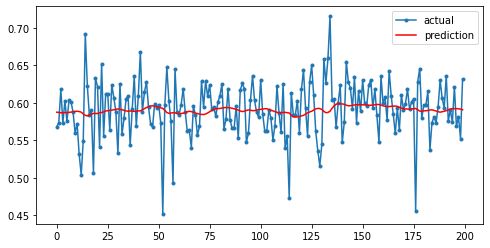

In [ ]:
###Taking a closer look
aa=[x for x in range(200)]
plt.figure(figsize=(8,4))
plt.plot(aa, y_test[:200], marker='.', label="actual")
plt.plot(aa, test_pred[:,0][:200], 'r', label="prediction")
plt.legend()
plt.show()

Text(0, 0.5, 'IBM Closing Returns')

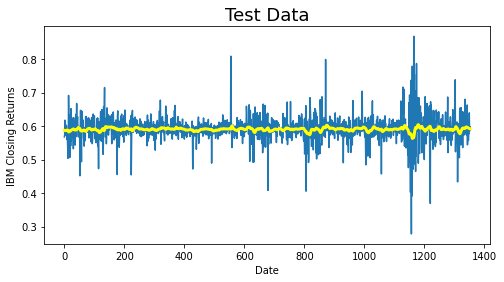

In [ ]:
##Overall graph
plt.figure(figsize=(8,4))
plt.plot(y_test, label='IBM Closing Returns')
plt.plot(test_pred, color='yellow', linewidth=3, label='Predicted IBM Closing Returns')
plt.title("Test Data", fontsize=18)
plt.xlabel('Date')
plt.ylabel('IBM Closing Returns')

In [1]:
!git clone https://github.com/AkhilaVangara/stockPrediction.git

Cloning into 'stockPrediction'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 9 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), done.


In [3]:
cd ..

/


In [5]:
cd content/

/content


In [6]:
ls

stockPrediction/


In [7]:
cd stockPrediction/

/content/stockPrediction


In [8]:
ls

IBM.csv  README.md  sample_data/
